In [1]:
%matplotlib inline

from classes.OfflineQLearningAgentClass import OfflineQLearningAgent
from utilities.plots import create_grids, plot_trajectory
from utilities.jsonRW import writeJSON

In [2]:
#Hyperparameters
show_stats = True       # show stats
export_to_JSON = False  # write JSON file
render = True           # render the results after training

NUM_AGENTS = 1

SHAPE = "14x14"             # "5x5" or "14x14"

if SHAPE == "5x5":
    N_MODELS = 23
    EPISODES_PER_AGENT = 1000
    MAX_STEPS_PER_EPISODE = 300
elif SHAPE == "14x14":
    N_MODELS = 9
    EPISODES_PER_AGENT = 3000
    MAX_STEPS_PER_EPISODE = 500

EPS_START = 1.0
EPS_DECAY = EPS_START/(EPISODES_PER_AGENT/2)  # reduce the exploration over time
EPS_END = 0.1

DISCOUNT_FACTOR = 0.95
LR = 0.02

In [3]:
#CREATING AND TRAINING THE AGENTS
agents_arr = []

print("Starting training of", NUM_AGENTS, "Q-learning agents")

for i in range(NUM_AGENTS):
    print("Agent", i+1, "/", NUM_AGENTS)
    agent = OfflineQLearningAgent(i, SHAPE, N_MODELS, EPISODES_PER_AGENT, MAX_STEPS_PER_EPISODE, LR, EPS_START, EPS_DECAY, EPS_END, DISCOUNT_FACTOR, reward = 1000)
    
    agent.train()
    agents_arr.append(agent)

Starting training of 1 Q-learning agents
Agent 1 / 1
Loading models...
Models loaded


100%|██████████| 3000/3000 [43:10<00:00,  1.16it/s]


La longitud estimada para el eje X del training error es: 1488083


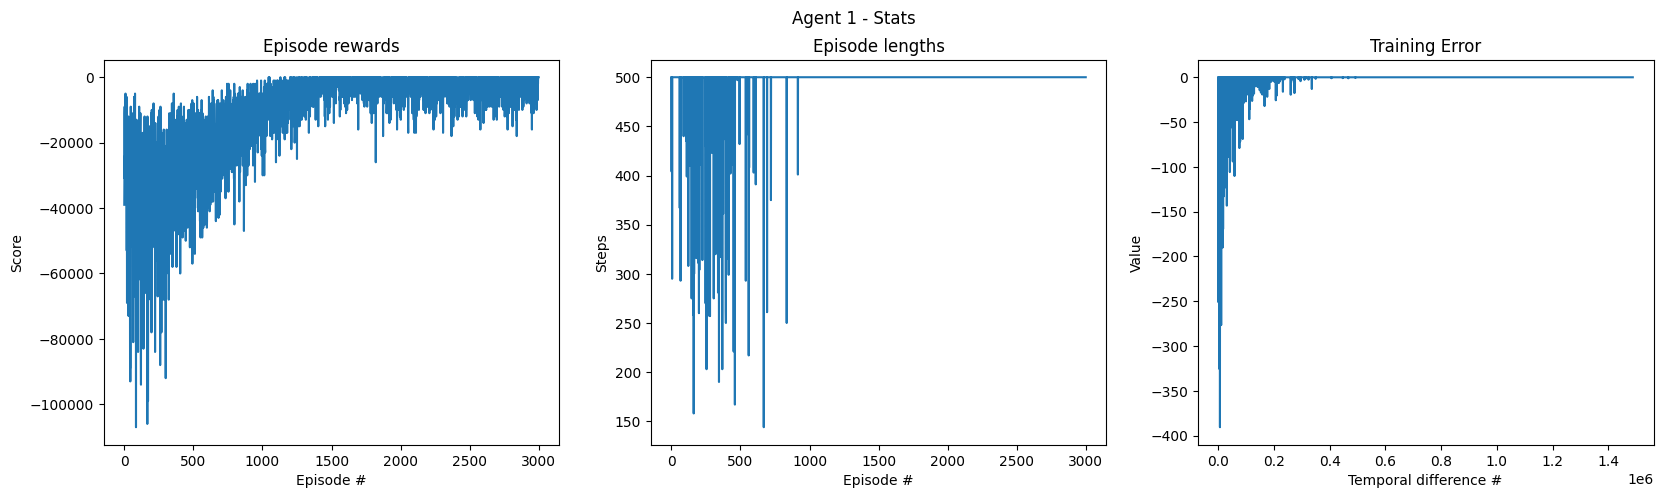

In [4]:
if show_stats:
    for agent in agents_arr:
        print("La longitud estimada para el eje X del training error es:", agent.total_steps)
        agent.plot_results(rolling_length=1, rolling_error=50)

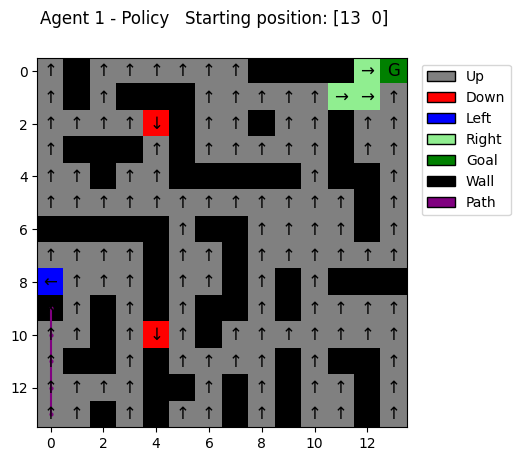

In [5]:
for agent in agents_arr:
    value_grid, policy_grid, string_policy_grid = create_grids(agent.env, agent=agent)
    start_pos = agent.env.unwrapped.start_pos

    if export_to_JSON:
        writeJSON(agent.algorithm, agent.n_episodes, agent.max_steps, agent.shape, start_pos, value_grid, policy_grid, string_policy_grid)

    if render:
        plot_trajectory(string_policy_grid, start_pos, agent.id+1)

In [6]:
#Hay muchos elementos en el rewardHistory que son iguales, quiero que solo haya uno de cada
#historico = dict.fromkeys(agent.env.unwrapped.rewardHistory)

print(len(agent.env.unwrapped.rewardHistory))

unicos = []


for i in agent.env.unwrapped.rewardHistory:

    stringo = str(i[0][0]) + ',' + str(i[0][1]) + ',' + str(i[1]) + ',' + str(i[2][0]) + ',' + str(i[2][1])
    
    if stringo not in unicos:
        unicos.append(stringo)

for stringo in unicos:
    print(stringo)


32839
8,0,1,8,0
8,0,0,8,0
10,4,0,9,4
5,6,3,5,7
5,7,3,5,8
5,8,1,6,8
8,10,2,8,9
13,8,1,14,8
5,7,1,5,7
1,10,3,1,11
13,6,2,13,6
4,3,3,4,4
5,3,2,5,3
5,3,3,5,3
2,9,3,2,10
5,9,1,6,9
8,8,3,8,9
4,3,2,4,2
2,4,0,1,4
3,8,1,3,8
2,12,3,2,12
